In [170]:
import pandas as pd
import geopandas
from pyrosm import OSM, get_data
import pandas as pd
pd.options.mode.chained_assignment = None

### Load London boundaries

In [48]:
fp = "../notebooks/geodata/foursquare_api/greater-london-latest.osm.pbf"
osm = OSM(fp)

In [94]:
london_df = osm.get_boundaries()

greater_london = london_df.iloc[36]

In [105]:
london_df

,name,website,admin_level,boundary,start_date,id,timestamp,version,changeset,geometry,tags,osm_type
0,London Borough of Sutton,https://www.sutton.gov.uk/,8,administrative,None,773453,1650539463,42,0,"POLYGON ((-0.24505 51.38004, -0.24505 51.38010...","{""ISO3166-2"":""GB-STN"",""council_name"":""Sutton C...",relation
1,City of Westminster,https://www.westminster.gov.uk/,8,administrative,None,3562195,1655375610,95,0,"POLYGON ((-0.21605 51.52792, -0.21604 51.52793...","{""ISO3166-2"":""GB-WSM"",""council_name"":""Westmins...",relation
2,Royal Borough of Kensington and Chelsea,https://www.rbkc.gov.uk/,8,administrative,None,3613988,1655375610,60,0,"POLYGON ((-0.22847 51.53032, -0.22841 51.53029...","{""ISO3166-2"":""GB-KEC"",""council_name"":""Royal Bo...",relation
3,City of London,https://www.cityoflondon.gov.uk/,6,administrative,None,3665788,1648257223,70,0,"POLYGON ((-0.11173 51.51319, -0.11182 51.51317...","{""ISO3166-2"":""GB-LND"",""alt_name"":""The City"",""c...",relation
4,London Borough of Tower Hamlets,https://www.towerhamlets.gov.uk/,8,administrative,None,3717593,1570730516,36,0,"POLYGON ((-0.08019 51.50687, -0.07999 51.50681...","{""ISO3166-2"":""GB-TWH"",""council_name"":""Tower Ha...",relation
...,...,...,...,...,...,...,...,...,...,...,...,...
84,Queen's Park,None,10,administrative,None,9727642886,1625931520,6,0,"POLYGON ((-0.21605 51.52792, -0.21604 51.52793...","{""council_name"":""Queen's Park Community Counci...",relation
85,Badgers Mount,None,10,administrative,None,13574136585,1562449282,5,0,"POLYGON ((0.16243 51.31640, 0.16234 51.31658, ...","{""designation"":""civil_parish"",""ref:gss"":""E0401...",relation
86,Batchworth,None,10,administrative,None,22986864752,1625928995,14,0,"POLYGON ((-0.48989 51.64436, -0.48997 51.64424...","{""designation"":""civil_parish"",""ref:gss"":""E0401...",relation
87,London Borough of Southwark,https://www.southwark.gov.uk/,8,administrative,None,10655154930,1654778108,19,0,"POLYGON ((-0.10919 51.50987, -0.10849 51.50989...","{""ISO3166-2"":""GB-SWK"",""council_name"":""Southwar...",relation


In [ ]:
housing_data['in_london'] = housing_data['geometry'].apply(lambda x: greater_london.contains(x))

london_data = housing_data[housing_data['in_london'] == True]

In [95]:
greater_london

name                                              Greater London
website                                                     None
admin_level                                                    5
boundary                                          administrative
start_date                                                  None
id                                                      36171525
timestamp                                             1654017860
version                                                      -65
changeset                                                      0
geometry       POLYGON ((-0.5097206 51.4691751, -0.510173 51....
tags           {"alt_name:vls":"Gr\u00F4ot-Loendn;Gr\u00F4ot-...
osm_type                                                relation
Name: 36, dtype: object

In [96]:
grenwich

OBJECTID                                                       1
OA_SA                                                  E00176563
SUB_REGION                                             Greenwich
REGION                                                    London
POPULATION                                                 423.0
SPRGRP                                                         4
GRP                                                           4a
SUBGRP                                                       4a3
Shape_Leng                                             803.00195
Shape_Area                                          37412.734264
geometry       POLYGON ((545981.1040000021 180113.62300000153...
coordinates         POINT (545906.0353462745 180239.13616319816)
Name: 0, dtype: object

In [24]:
df = pd.read_csv("oac_shapefile.csv", index_col=0)

In [87]:
grenwich  = df.iloc[0]

In [93]:
greater_london.contains(grenwich.geometry)

False

In [ ]:
from shapely import wkt

df['geometry'] = geopandas.GeoSeries.from_wkt(df['geometry'])

In [82]:
df['coordinates'] = df.geometry.apply(lambda x: x.centroid.wkt)

In [85]:
df['coordinates'] = geopandas.GeoSeries.from_wkt(df['coordinates'])

In [97]:
gdf = geopandas.GeoDataFrame(
    df, geometry='geometry', crs = 27700)

<AxesSubplot:>

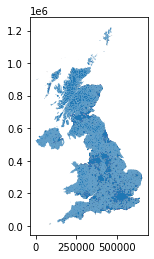

In [98]:
gdf.plot()

In [106]:
gdf = gdf.to_crs(4326)

In [116]:
gdf['coordinates'] = gdf.geometry.apply(lambda x: x.centroid)

In [119]:
greater_london.geometry.contains(gdf.iloc[0].geometry)

True

In [121]:
gdf['in_london'] = gdf['geometry'].apply(lambda x: greater_london.geometry.contains(x))

# london_data = housing_data[housing_data['in_london'] == True]

In [123]:
gdf_london = gdf[gdf['in_london'] == True]

In [127]:
gdf_london.to_csv("london_oac.csv")

### Only London Area

In [130]:
gdf_london.head()

,OBJECTID,OA_SA,SUB_REGION,REGION,POPULATION,SPRGRP,GRP,SUBGRP,Shape_Leng,Shape_Area,geometry,coordinates,in_london
0,1,E00176563,Greenwich,London,423.0,4,4a,4a3,803.001950,37412.734264,"POLYGON ((0.10179 51.50111, 0.10176 51.50112, ...",POINT (0.10076 51.50226),True
5,6,E00176566,Greenwich,London,307.0,3,3d,3d2,1380.906056,37356.406144,"POLYGON ((0.01339 51.48611, 0.01360 51.48609, ...",POINT (0.01252 51.48497),True
6,7,E00176568,Greenwich,London,451.0,3,3b,3b3,179.109337,1716.711335,"POLYGON ((0.06530 51.49107, 0.06527 51.49107, ...",POINT (0.06513 51.49123),True
44,45,E00008256,Greenwich,London,248.0,3,3a,3a1,1174.334392,30164.879027,"POLYGON ((0.02278 51.44583, 0.02285 51.44574, ...",POINT (0.02175 51.44453),True
51,52,E00008254,Greenwich,London,285.0,3,3a,3a1,1763.566088,90900.096948,"POLYGON ((0.04581 51.44632, 0.04579 51.44620, ...",POINT (0.04332 51.44518),True


<AxesSubplot:>

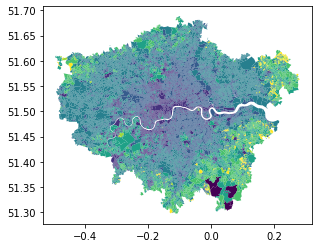

In [131]:
gdf_london.plot(column='SPRGRP')

### Get points of interest

In [134]:
my_filter={"shop":['convenience', 'clothes', 'supermarket', 'books', 'gift', 'shoes', 'toys', 'greengrocer', 'grocery'], "amenity": ["bank", "school", "restaurant", "cafe", "library",  "bar", "cinema", "park", "arts_center", "theatre"],
          "leisure": ["park"]}
pois = osm.get_pois(custom_filter=my_filter)

to_keep = ['restaurant', 'cafe', 'convenience', 'clothes', 'supermarket', 'bank', 'school', 'books', 'library', 'bar', 'gift', 'shoes', 'toys', 'greengrocer', 'grocery', 'cinema', 'park', 'arts_center', 'theatre']

# Merge poi type information into a single column
pois["shop"] = pois["shop"].fillna(' ')
pois["amenity"] = pois["amenity"].fillna(' ')
pois["leisure"] = pois["leisure"].fillna(' ')
pois["poi_type"] = pois["amenity"] + pois["shop"] + pois["leisure"]

# Plot
ax = pois.plot(column="poi_type", legend=True, markersize=4, figsize=(14,8), legend_kwds=dict(loc='upper left', ncol=2, bbox_to_anchor=(1, 1)))

In [135]:
pois['poi_type_clean'] = pois['poi_type'].apply(lambda x: x.strip())

points_to_keep = pois[pois['poi_type_clean'].isin(to_keep)]

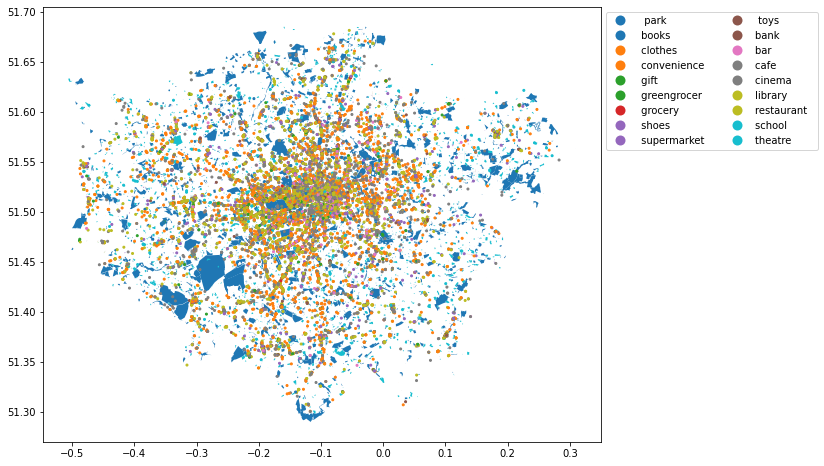

In [136]:
ax = points_to_keep.plot(column="poi_type", legend=True, markersize=4, figsize=(14,8), legend_kwds=dict(loc='upper left', ncol=2, bbox_to_anchor=(1, 1)))

In [138]:
points_to_keep['geometry'] = points_to_keep.geometry.centroid

ax = points_to_keep.plot(column="poi_type", legend=True, markersize=4, figsize=(14,8), legend_kwds=dict(loc='upper left', ncol=2, bbox_to_anchor=(1, 1)))

In [139]:
london_pois = points_to_keep[['geometry', 'poi_type_clean']]

In [140]:
amenities = {
    "grocery": ['convenience', 'supermarket', 'greengrocer', 'grocery'],
    "restaurants": ['restaurant', 'bar', 'clothes'],
    "shopping": ['toys', 'shoes', 'gift'],
    "coffee": ['cafe'],
    "banks": ['bank'],
    "parks": ['park'],
    "schools": ['school'],
    "books": ['books', 'library'],
    "entertainment": ['cinema', 'theatre'],
    }

amenity_weights = {
"grocery": [3],
"restaurants": [.75, .45, .25, .25, .225, .225, .225, .225, .2, .2],
"shopping": [.5, .45, .4, .35, .3],
"coffee": [1.25, .75],
"banks": [1],
"parks": [1],
"schools": [1],
"books": [1],
"entertainment": [1],
}

def group_amenities(amenity):
    for key, values in amenities.items():
        if amenity in values:
            return key

london_pois['amenities'] = london_pois['poi_type_clean'].apply(group_amenities)

In [141]:
london_pois.amenities.value_counts()

restaurants      11610
grocery           5670
coffee            5378
parks             3465
schools           3269
shopping          1035
banks              949
books              685
entertainment      375
Name: amenities, dtype: int64

In [144]:
from math import radians

In [146]:
london_pois

,geometry,poi_type_clean,amenities
0,POINT (-0.19350 51.60203),restaurant,restaurants
1,POINT (-0.11561 51.52108),library,books
2,POINT (-0.02070 51.44463),library,books
3,POINT (-0.33402 51.41101),cafe,coffee
4,POINT (-0.11896 51.51735),bar,restaurants
...,...,...,...
32628,POINT (-0.11185 51.46752),park,parks
32629,POINT (0.08598 51.56859),school,schools
32630,POINT (-0.08873 51.52366),park,parks
32631,POINT (0.00836 51.46664),restaurant,restaurants


In [149]:
london_pois['lon'] = london_pois['geometry'].x
london_pois['lat'] = london_pois['geometry'].y

london_pois['lon_rad'] = london_pois['lon'].apply(lambda x: radians(x))
london_pois['lat_rad'] = london_pois['lat'].apply(lambda x: radians(x))

In [151]:
london_pois

,geometry,poi_type_clean,amenities,lon,lat,lon_rad,lat_rad
0,POINT (-0.19350 51.60203),restaurant,restaurants,-0.193503,51.602032,-0.003377,0.900625
1,POINT (-0.11561 51.52108),library,books,-0.115614,51.521076,-0.002018,0.899212
2,POINT (-0.02070 51.44463),library,books,-0.020698,51.444626,-0.000361,0.897878
3,POINT (-0.33402 51.41101),cafe,coffee,-0.334017,51.411007,-0.005830,0.897291
4,POINT (-0.11896 51.51735),bar,restaurants,-0.118957,51.517345,-0.002076,0.899147
...,...,...,...,...,...,...,...
32628,POINT (-0.11185 51.46752),park,parks,-0.111845,51.467516,-0.001952,0.898278
32629,POINT (0.08598 51.56859),school,schools,0.085978,51.568587,0.001501,0.900042
32630,POINT (-0.08873 51.52366),park,parks,-0.088732,51.523663,-0.001549,0.899258
32631,POINT (0.00836 51.46664),restaurant,restaurants,0.008357,51.466644,0.000146,0.898262


In [201]:
def get_walk_score(oa_longitude, oa_latitude, df):
    radian_longitude = radians(oa_longitude)
    radian_latitude = radians(oa_latitude)

    earth_radius = 6371000 # meters in earth

    new_df = pd.DataFrame()
    df = df.copy()

    for key, values in amenity_weights.items():

        current_df = df[df['amenities'] == key]
        current_df.reset_index(drop=True, inplace=True)
        current_ball = BallTree(current_df[['lon_rad', 'lat_rad']].values, metric='haversine')
        k = len(values)

        distances, indices = current_ball.query([[radian_longitude, radian_latitude]], k=k, return_distance  = True)


        distance_in_meters = [x * earth_radius for x in distances]

        if k > 1:
            result_df = current_df[current_df.index.isin(indices[0])]

        else: 
            result_df = current_df.iloc[indices[0]]


        ### Add series

        dist_series = pd.Series(distance_in_meters[0], index=indices[0], name='distance')
        weight_series = pd.Series(values, index=indices[0], name='weights')
        result_df['distance'] = dist_series
        result_df['weights'] = weight_series
        new_df = pd.concat([new_df, result_df], axis=0, join='outer')

        ### Calculate score

    new_df['distance_decayed'] = new_df['distance'].apply(lambda x: float(distance_decay(x)))
    new_df['weighted_distance'] = new_df['weights'] * new_df['distance_decayed'] * 6.67
    scores = new_df[['weighted_distance', 'amenities']].groupby('amenities').sum()
    walk_score = scores.sum().values[0]
    return walk_score

def distance_decay(distance):
    M = float(1)
    dist = distance/1000
    score = math.e**((-5.0*(dist/4))**5.0)
    return score

### Get walk scores

In [166]:
from scipy.spatial import KDTree
import math
from sklearn.neighbors import BallTree

In [162]:
test_lon = gdf_london.iloc[0].coordinates.x
test_lan = gdf_london.iloc[0].coordinates.y

In [206]:
gdf_london.shape

(24803, 14)

In [209]:
24803/100 * 3.66 / 60

15.12983

In [211]:
%%time
for row in gdf_london.itertuples():
    index = row.Index
    latitude = gdf_london.loc[index].coordinates.y
    longitude = gdf_london.loc[index].coordinates.x
    score = get_walk_score(longitude, latitude, london_pois)
    gdf_london.at[index, 'walk_score'] = score

CPU times: user 15min 6s, sys: 8.38 s, total: 15min 15s
Wall time: 15min 23s


In [203]:
get_walk_score(test_lon, test_lan, london_pois)

20.824060819963652

<AxesSubplot:>

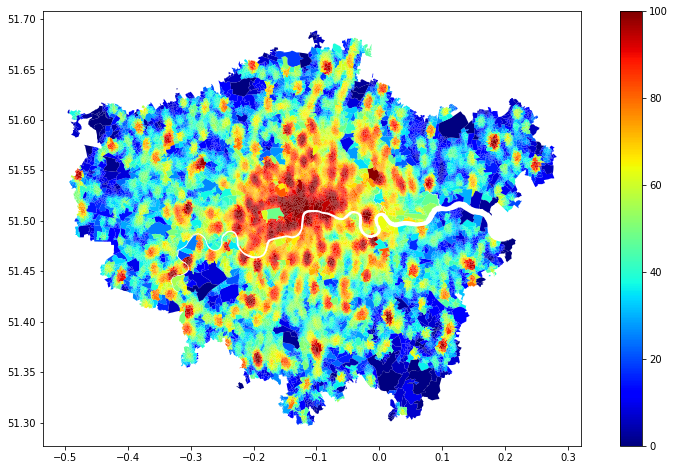

In [216]:
gdf_london.plot(column='walk_score', cmap='jet', legend=True, figsize=(14,8))

In [217]:
gdf_london.to_csv("walk_scores_london.csv")

<AxesSubplot:>

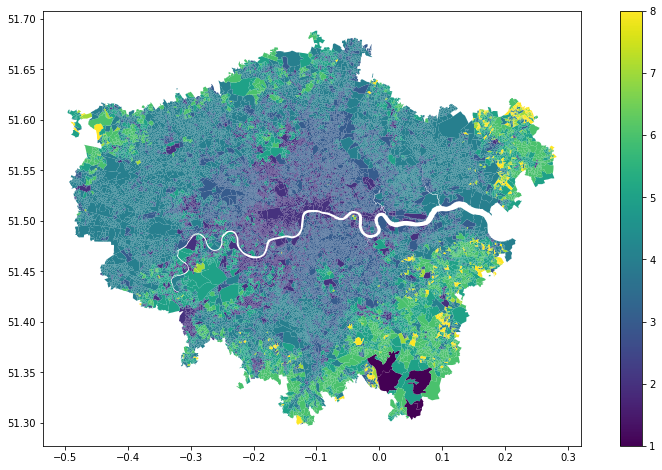

In [219]:
gdf_london.plot(column='SPRGRP', legend=True, figsize=(14,8))